# 데이터베이스
---
* 데이터를 연산하는 방법에 대해 학습합니다.
* Pandas, Class를 이용한 데이터 연산법을 연습합니다.
* Database에 대해 학습하고, Python을 이용해 간단한 Database를 직접 사용해 봅니다.
---
* 데이터 관리 프로그램 만들기
* 파일 시스템 활용
* 판다스와 csv 파일
* 판다스의 유용한 기능들
* 판다스 Transform 실전연습
* 데이터베이스
* 다중 사용자 환경
* 데이터베이스의 세계로
* SQL
* 파이썬 DB API

**목표: 월급을 계산하고, 월급이 가장 높은 사원을 찾는 프로그램**
## pandas 없이 데이터 관리

In [1]:
# 1단계: 의사코드 
def summarize():
    #파일 이름을 입력받는다.
    #파일을 읽기 모드로 열어 한 줄씩 파일을 읽는다. 
    #파일의 각 행의 데이터 속성을 갖는 인스턴스 객체(사원객체)를 만든다. 
      # 사전에 employee 클래스 설계 필요!
      # 사전에 인스턴스 사원 객체를 만드는 함수 필요!  
    #월급이 가장 높은 사원을 찾는 코드를 구현한다. 
    #결과를 출력한다. 
    pass

In [2]:
class Employee:
    def __init__ (self, name, division, jobgrade, years, basic):
        self.name = name
        self.division = division
        self.jobgrade = int(jobgrade)
        self.years = int(years)
        self.basic = float(basic)

print('슝=3')
# 텍스트 파일에서 불러온 각각의 데이터는 string으로 처리됩니다. 따라서 형 변환을 해주세요.

슝=3


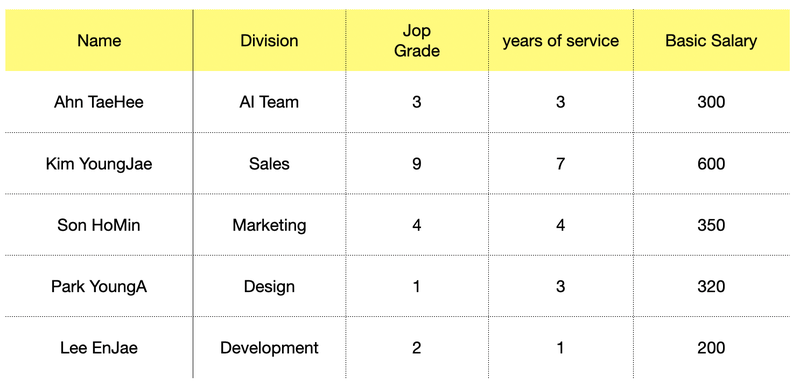

In [3]:
# Ahn TaeHee의 경우만 하드코딩 
employee = Employee(name='Ahn TaeHee',
                   division = 'AI Team',
                   jobgrade = 3,
                   years = 3,
                   basic = 300)

In [4]:
employee

In [5]:
# 사전에 인스턴스 사원 객체를 만드는 함수 필요!  
# 텍스트 파싱 후, Employee 클래스 인스턴스 생성 
def make_employee(inputdata):
    name, division, jopgrade, year, basic = inputdata.split(',')
    return Employee(name, division, jopgrade, year, basic)
print('슝=3')

슝=3


In [6]:
# 파일 리스트 각각에 대해 Employee 클래스 인스턴스 생성
import os

file_path = os.getenv("HOME") + '/aiffel/data_handling/data/employeefile.txt'
print(file_path)
inputfile = open(file_path, 'r')

for i in inputfile:
    e = make_employee(i)

/home/aiffel-dj19/aiffel/data_handling/data/employeefile.txt


In [7]:
# 사전에 employee 클래스 설계 필요!
# 정보 접근자 메소드 추가
class Employee:
    def __init__ (self, name, division, jobgrade, years, basic):
        self.name = name
        self.division = division
        self.jobgrade = int(jobgrade)
        self.years = int(years)
        self.basic = float(basic)
        self.salary = 0
        
    # 급여 계산
    def get_salary(self):
        self.salary = self.basic + (self.years*self.basic*0.1)
        return self.salary
    
    def get_name(self):
        return self.name
    
    def get_division(self):
        return self.division
    
    def get_jobgrade(self):
        return self.jobgrade
    
    def get_years(self):
        return self.years
    
    def get_basic(self):
        return self.basic

print('슝=3')

슝=3


In [8]:
# 파일을 열고 각 사원의 월급을 비교해서 가장 높은 월급을 가진 사원의 정보를 출력
def summarize():
    #파일 이름을 입력받는다.
    file_path = os.getenv("HOME") + '/aiffel/data_handling/data/employeefile.txt'
    
    #파일을 읽기 모드로 열어 한 줄씩 파일을 읽는다. 
    input_file = open(file_path, 'r')
    
    #파일의 각 행의 데이터 속성을 갖는 인스턴스 객체(사원객체)를 만든다. 
    highest = make_employee(input_file.readline())
    
    #월급이 가장 높은 사원을 찾는 코드를 구현한다. 
    for i in input_file:
        e = make_employee(i)
        if e.get_salary() > highest.get_salary():
            highest = e
            
    input_file.close()
        
    print("Highest Employee' Name: ", highest.get_name())
    print("Years of service: ", highest.get_years())
    print("Division: ", highest.get_division())
    print("Salay: ", highest.get_salary())
        
    #결과를 출력한다. 
    print('done!')

In [9]:
summarize()

Highest Employee' Name:  Kim YoungJae
Years of service:  7
Division:   Sales
Salay:  1020.0
done!


---
## pandas로 데이터 관리 


In [13]:
import pandas as pd
import numpy as np
import os

In [11]:
file_path = os.getenv("HOME") + '/aiffel/data_handling/data/Salaries.csv'
sal = pd.read_csv(file_path)

sal.head(5)

/home/aiffel-dj19/anaconda3/envs/aiffel/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [12]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148645.000000,148040.000000,148645.000000,148645.00000,112486.000000,148645.000000,148645.000000,148645.000000,0.0
mean,74323.000000,66327.688960,5066.230294,3648.89419,25009.004751,74772.853123,93698.231767,2012.522554,NaN
std,42910.259719,42763.620451,11454.535520,8056.70753,15401.655689,50515.178054,62791.195806,1.117512,NaN
min,1.000000,-166.010000,-0.010000,-7058.59000,-33.890000,0.000000,-33.890000,2011.000000,NaN
25%,37162.000000,33590.347500,0.000000,0.00000,11540.527500,36173.240000,44083.120000,2012.000000,NaN
50%,74323.000000,65008.860000,0.000000,811.35000,28628.875000,71427.790000,92406.390000,2013.000000,NaN
75%,111484.000000,94691.050000,4658.480000,4236.74000,35566.957500,105846.060000,132880.270000,2014.000000,NaN
max,148645.000000,319275.010000,245131.880000,400184.25000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [14]:
sal['BasePay'].mean()

66327.68895967308

In [15]:
sal['OvertimePay'].max()

245131.88

In [54]:
sal['JobTitle'][sal['EmployeeName']=='JOSEPH DRISCOLL']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [28]:
sal['TotalPayBenefits'][sal['EmployeeName']=='JOSEPH DRISCOLL']

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [25]:
sal['EmployeeName'][sal['TotalPayBenefits']==sal['TotalPayBenefits'].max()]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [26]:
sal['EmployeeName'][sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()].count()

1

In [27]:
sal['EmployeeName'][sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()]

110530    David P Kucia
Name: EmployeeName, dtype: object

In [31]:
sal['BasePay'][sal['Year']==2011].mean()

63595.95651677314

In [32]:
sal['BasePay'][sal['Year']==2012].mean()

65436.40685742263

In [33]:
sal['BasePay'][sal['Year']==2013].mean()

69630.03021648065

In [34]:
sal['BasePay'][sal['Year']==2014].mean()

66573.15420422942

In [35]:
# Q7을 위한 코드를 작성해 주세요.
sal['BasePay'][sal['Year']==2011].mean(), \
sal['BasePay'][sal['Year']==2012].mean(), \
sal['BasePay'][sal['Year']==2013].mean(), \
sal['BasePay'][sal['Year']==2014].mean()

(63595.95651677314, 65436.40685742263, 69630.03021648065, 66573.15420422942)

In [37]:
sal['JobTitle'].nunique()

2158

In [42]:
sal['JobTitle'].value_counts()[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [48]:
# chief를 포함하는 jobtitle 찾기 
def chief_string(title : str):
    if 'chief' in title.lower().split():
        return True
    else:
        return False

In [51]:
sal['JobTitle'].apply(lambda x : chief_string(x)).sum()

477

--- 
## 다중 사용자 환경일 때 데이터베이스 관리

In [55]:
C_account = 100      # 현재 C 고객 계좌 잔고는 100

C_account_by_A_process = 100    # A 고객 응대 프로그램이 C 고객 계좌 잔고를 조회했습니다 
C_account_by_B_process = 100    # B 고객 응대 프로그램이 C 고객 계좌 잔고를 조회했습니다 

C_account_by_A_process = C_account_by_A_process + 50   # A 고객이 50을 입금했습니다. 
C_account_by_B_process = C_account_by_B_process + 30   # A 고객이 30을 입금했습니다. 

C_account = C_account_by_A_process     # A 고객의 입금이 C 고객 계좌 잔고에 반영되었습니다. 
C_account = C_account_by_B_process     # B 고객의 입금이 C 고객 계좌 잔고에 반영되었습니다. 

print(C_account)     # C 고객 계좌 잔고는 얼마일까요?

130


In [56]:
import sqlite3
conn = sqlite3.connect('example.db')